In [20]:
import pickle
import logging
import pandas as pd
import numpy as np
% matplotlib inline

In [ ]:
from cube_fil_finder.galfa import galfa_const

In [2]:
prop_df = pd.read_csv('../../data_out/fifth_batch_all_prop_v2.csv')

In [3]:
print('starting out with {} trees'.format(len(prop_df)))

starting out with 3395 trees


### basket weaves and edges

manually picked out by looking at the column plots

In [4]:
bw_and_edges_keys = [
    '900_1066_1', '375_1057_25', '798_1012_3', '947_1049_0', '1259_1063_0',
    '418_1050_6', '467_1074_13', '620_1013_5', '684_1054_7', '791_1055_3',
    '850_993_2', '859_1000_1', '940_1015_3', '1083_1061_2', '1175_1061_0',
    '1383_1060_0', '2381_1000_0', '364_1008_0', '379_1016_4', '383_1030_1',
    '390_1084_6', '396_1039_2', '420_985_12', '437_1016_13', '471_1043_8',
    '474_1003_12', '500_1031_0', '609_1041_4', '614_976_2', '621_999_0',
    '628_1023_0', '699_989_0', '742_1016_1', '746_1040_2', '766_1042_1',
    '865_1025_5', '871_1005_0', '911_1024_3', '955_1059_1', '959_1010_0',
    '971_1057_1', '1030_1010_0', '1043_1042_0', '1098_1026_3', '1258_1034_0',
    '1294_1019_0', '1731_1054_0', '1884_1007_0', '2068_1019_0', '2116_1024_2',
    '460_1020_2', '1978_1028_0', '594_1022_2', '1020_1032_2', '1969_1030_0',
    '559_971_0', '756_1035_4', '1169_1040_1', '1670_985_0', '2923_1029_0',
    '423_1015_16', '482_1025_10', '557_1035_4', '951_968_3', '1103_1052_1',
    '1196_986_2', '1302_1042_0', '3142_1048_0'
]

In [5]:
prop_ex_bw_edge_df = prop_df.loc[~prop_df['id'].isin(bw_and_edges_keys)]

In [6]:
print('after taking out bw and edges we have {} trees'.format(len(prop_ex_bw_edge_df)))

after taking out bw and edges we have 3327 trees


### fitting based

removall of
- fits that failed on the original data, or
- had an error larger than 10% of the full width, or
- the original data gave a smaller width than the unsharp masked data

In [7]:
prop_ex_bw_edge_df.columns

Index([u'average_velocity', u'b', u'column_density_mean',
       u'column_density_mean_raw', u'column_density_mean_raw_no_umask',
       u'column_density_median', u'column_density_median_raw',
       u'column_density_median_raw_no_umask', u'column_density_peak',
       u'column_density_peak_raw', u'column_density_peak_raw_no_umask', u'dec',
       u'id', u'l', u'moment_0_mean', u'moment_0_mean_raw',
       u'moment_0_mean_raw_no_umask', u'moment_0_median',
       u'moment_0_median_raw', u'moment_0_median_raw_no_umask',
       u'moment_0_peak', u'moment_0_peak_raw', u'moment_0_peak_raw_no_umask',
       u'moment_1_mean', u'moment_1_median', u'moment_2_mean',
       u'moment_2_median', u'moment_2_peak', u'ra', u'roundness', u'size',
       u'starting_velocity', u'velocity_span', u'width_chisq',
       u'width_chisq_raw', u'width_chisq_raw_no_umask', u'width_err',
       u'width_err_raw', u'width_err_raw_no_umask', u'width_fit',
       u'width_fit_raw', u'width_fit_raw_no_umask',
       u

In [8]:
prop_fit_filtered_df = prop_ex_bw_edge_df.loc[  # removal of
    ~(prop_ex_bw_edge_df['width_fit'].isnull()) &  # failed fits
    ~(prop_ex_bw_edge_df['width_err'] > prop_ex_bw_edge_df['width_fit'] * .1) &  # of when err > 10% of width
    ~(prop_ex_bw_edge_df['width_fit_raw_no_umask'] < prop_ex_bw_edge_df['width_fit']) # of when raw fit < unsharp fit
]

In [9]:
print('after filtering on fit based requirements we have {} trees'.format(len(prop_fit_filtered_df)))

after filtering on fit based requirements we have 2823 trees


In [16]:
prop_fit_filtered_df['num_channels'] = (prop_fit_filtered_df.velocity_span 
                                        / galfa_const.GALFA_W_SLICE_SEPARATION)\
    .apply(lambda x: int(round(x)))

/Users/larryli/anaconda/envs/py27research/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
prop_fit_filtered_df.to_csv('../../data_out/fifth_batch_all_prop_v2_manual_and_fit_filtered.csv', index=False)

In [18]:
prop_fit_filtered_df = pd.read_csv('../../data_out/fifth_batch_all_prop_v2_manual_and_fit_filtered.csv')

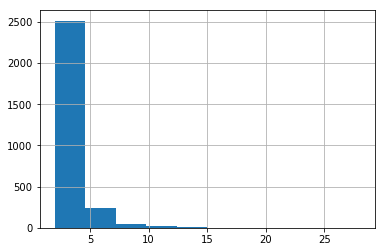

In [22]:
prop_fit_filtered_df.num_channels.hist()

# colum plot moves

In [35]:
import os
import glob

In [55]:
base_column_dir = '/Users/larryli/Dropbox/GALFA_filfind_yes_no_maybe/column_plots/fifth_batch_columns'

In [56]:
filtered_fil_ids = set(prop_fit_filtered_df['id'].unique())
dry_run = False
for folder in ['1_6', '1_8', '1_10', '1_12']:
    base_dir = os.path.join(base_column_dir, folder)
    f_names = glob.glob(base_dir + '/*')
    for f_name in f_names:
        fil_id = f_name.rsplit('/', 1)[-1].replace('.pdf', '')
        if fil_id in filtered_fil_ids:
            continue
        else:
            new_f_name = f_name.replace('fifth_batch_columns', 'fifth_batch_columns/to_remove')
            if dry_run:
                print(f_name, new_f_name)
            else:
                os.rename(f_name, new_f_name)